## 1. import modules

In [19]:
from PIL import Image,ImageFilter
from scipy.misc import toimage
from operator import itemgetter
# from skimage import measure
import numpy as np
import copy
import heapq
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage.filters import median_filter
import math

### 2. convert image from RGB to gray

In [157]:
image_path = '/tmp/tmpfy7l5qjp.PNG'
image_path = '/tmp/tmp4u80rgr1.PNG'

In [158]:
im = Image.open(image_path)

In [159]:
image = cv2.imread(image_path)

In [160]:
im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

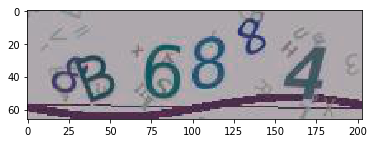

In [161]:
plt.imshow(image)
plt.show()

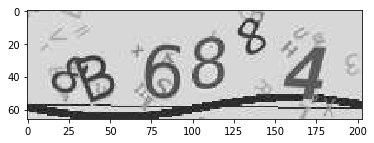

In [162]:
plt.imshow(im, cmap='gray')
plt.show()

In [163]:
im

array([[160, 152, 153, ..., 170, 170, 170],
       [159, 159, 165, ..., 170, 170, 170],
       [148, 157, 169, ..., 170, 170, 170],
       ...,
       [172, 157, 182, ..., 171, 171, 171],
       [170, 170, 170, ..., 170, 170, 170],
       [170, 170, 170, ..., 170, 170, 170]], dtype=uint8)

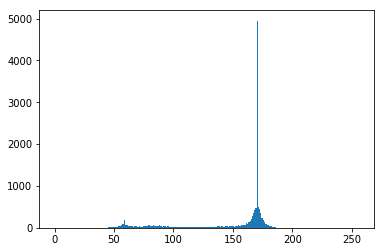

In [164]:
plt.hist(im.ravel(),256,[0,256]); plt.show()


### 3. calculate color histogram and find the second largest color

In [149]:
def del_noise(im_cut, max_bin = -4):
    ''' variable：bins：灰度直方图bin的数目
                  num_gray:像素间隔
        method：1.找到灰度直方图中像素第二多所对应的像素，即second_max,因为图像空白处比较多所以第一多的应该是空白，第二多的才是我们想要的内容。
                2.计算mode
                3.除了在mode+-一定范围内的，全部变为空白。
    '''
    bins =16
    num_gray = math.ceil(256 / bins)
    hist = cv2.calcHist([im_cut], [0], None, [bins], [0, 256])
    lists = []
    for i in range(len(hist)):
        # print hist[i][0]
        lists.append(hist[i][0])
    second_max = sorted(lists)[max_bin]
    bins_second_max = lists.index(second_max)

    mode = (bins_second_max + 0.5) * num_gray
    from copy import copy
    im_cuting = copy(im_cut)
    for i in range(len(im_cut)):
        for j in range(len(im_cut[0])):
            if im_cuting[i][j] < mode - 15 or im_cuting[i][j] > mode + 15:
                # print im_cut[i][j]
                im_cuting[i][j] = 255
    return im_cuting

In [ ]:
cv2.calcHist

In [154]:
im_cuts = del_noise(im, -4)

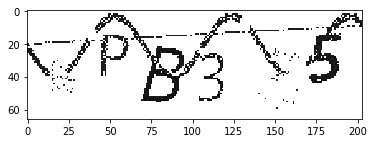

In [155]:
plt.imshow(im_cuts, cmap='gray')
plt.show()

In [167]:
import urllib, requests

In [171]:
from jtyoui.code import cr

In [181]:
code = cr.decode(filename="/tmp/tmpcbk5m2uj.PNG", code_type=1004, timeout=60)

In [182]:
code

''

### SVM

In [184]:

import sys,os
import urllib

import cv2
import numpy as np
import requests
#垂直像素分布
def Y_sum(im):
    width = len(im[0,:])
    height= len(im[:,0])
    ps=[]
    #统计垂直像素
    for x in range(width):
        ps.append(0)
        for y in range(height):
            #print x,y
            if im[y,x]==255:  
                ps[x]=ps[x]+1
    #print ps 
    dist_image=np.uint8(np.zeros((height,width)))
    #画图
    for x in range(width):
        for y in range(ps[x]):    
            dist_image[height-y-1,x]=255

    return dist_image

#水平像素分布
def X_sum(im):
    width = len(im[0,:])
    height= len(im[:,0])
    ps=[]
    #统计垂直像素
    for x in range(height):
        ps.append(0)
        for y in range(width):
            #print x,y
            if im[y,x]==255:  
                ps[x]=ps[x]+1
    #print ps 
    dist_image=np.uint8(np.zeros((height,width)))
    #画图
    for x in range(height):
        for y in range(ps[x]):    
            dist_image[x,width-y-1]=255

    return dist_image
